# Pendel
Vi skal modellere en pendel på flere måter

### Kurvetilpassing

Vi måle samsvarende svingetider og 

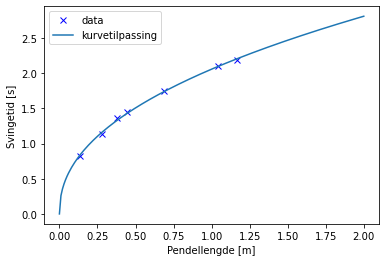

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#datasett
lengde=[0.135,0.28,0.38,0.445,0.69,1.045,1.17]
svingetid=np.array([8.2,11.3,13.6,14.5,17.5,21,21.9])/10

# funksjonstypen vi vil tilpasse, med rett antall parmetre
def funksjon(x,a,b):
    return a*x**b

# plottet datasettet for å bedre kunne velge funksjon    
plt.plot(lengde,svingetid,'xb',label='data')

# popt - parametre, pcov - estimert kovarians
popt, pcov=curve_fit(funksjon,lengde,svingetid)

# pcov kan brukes til å finne standardavviket til parametrene
# perr = np.sqrt(np.diag(pcov))

# plotter den tilpassende kurven 
xverdier=np.linspace(0,2,200)
yverdier=funksjon(xverdier,*popt) # *
plt.plot(xverdier,yverdier,label='kurvetilpassing')
plt.xlabel('Pendellengde [m]')
plt.ylabel('Svingetid [s]')
plt.legend()
plt.show()

In [2]:
popt

array([2.05693595, 0.44952455])

### Matematisk pendel
For små utslag svinger en pendel tilnærmet som en harmonisk svigning med svingetid gitt ved:
$$T\approx 2\pi\sqrt{\frac{l}{g}}$$

<div class="alert alert-block alert-info">
<b>Oppgave: </b>Lag et nytt plott som innholder både data, kurvetilpassing og den matematiske modellen over.</div>

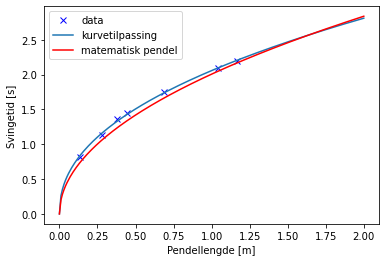

In [3]:
xverdier=np.linspace(0,2,200)
yverdier=funksjon(xverdier,*popt) # *
plt.plot(lengde,svingetid,'xb',label='data')
plt.plot(xverdier,yverdier,label='kurvetilpassing')
plt.xlabel('Pendellengde [m]')
plt.ylabel('Svingetid [s]')


def f(x):
    return 2*np.pi*np.sqrt(x/9.81)
plt.plot(xverdier,f(xverdier),label='matematisk pendel',color='red')
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>Oppgave: </b>Harmonisk svigning betyr at svigningen kan modelleres med en sinusfunksjon. Se på oppslaget om ipywidgets, her lærer du både om widgets og undersøker sinusfunksjoner. Jobb med den og kom tilbake hit etterpå</div>

### Animer en matematisk pendel ved hjelp av ipywidgets

<div class="alert alert-block alert-info">
<b>Oppgave: </b>Under er en funksjon som tar inn en vinkel med mulighet for å endre lengde og tegner en pendel. Kan du endre funksjonen slik at den i stede for vinkel tar inn tid og regner ut vinkelen selv? Lag en callback funksjon og bruk play-widgeten til å animere pendelen</div>

In [4]:
def pendel(theta,lengde=4):
    ax = plt.axes()

    ax.set_aspect('equal','box')
    ax.plot([0,lengde*np.sin(theta)],[0,-lengde*np.cos(theta)],'b')
    ax.plot(lengde*np.sin(theta),-lengde*np.cos(theta),'ob',markersize=20)
    plt.xlim(-5.5,5.5)
    plt.ylim(-5.5,0.5)

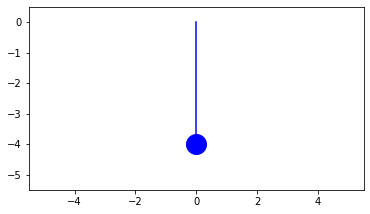

In [5]:
pendel(0)

<div class="alert alert-block alert-info">
    <b>Oppgave: </b> Legg til en widget som lar deg endre lengden på pendelen. Klarer du å fikse svingetiden slik at den endres når lengden endres?</div>

<div class="alert alert-block alert-info">
<b>Utfordring: </b>Klarer du å justere "interval" og evt "step" slik at svingetiden til den modellerte pendelen stemmer med en reel pendel?</div>

### En intro til differential likninger
Kan vi bruke deler av filmen til å lage en bedre modell av pendelen som også virker for større vinkler?

In [6]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/p_di4Zn4wz4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# fra filmen
import numpy as np

# Konstanter
g= 9.81 #m/s^2
L = 2
mu = 0.1

THETHA_0 = np.pi/3 # 60 grader
THETHA_DOT_0 =0    # Ingen startvinkelfart

# Differensiallikningen
def get_theta_doube_dot(theta,theta_dot):
    return -mu * thetha_dot - (g/L)*np.sin(theta)

def theta(t):
    # starter å forandre verdiene
    thetha = THETA_0
    thetha_dot = THETHA_DOT_0
    delta_t = 0.01
    
    for time in np.arange(0,t, delta_t):
        theta_double_dot = 
    


### Fra kraft 2
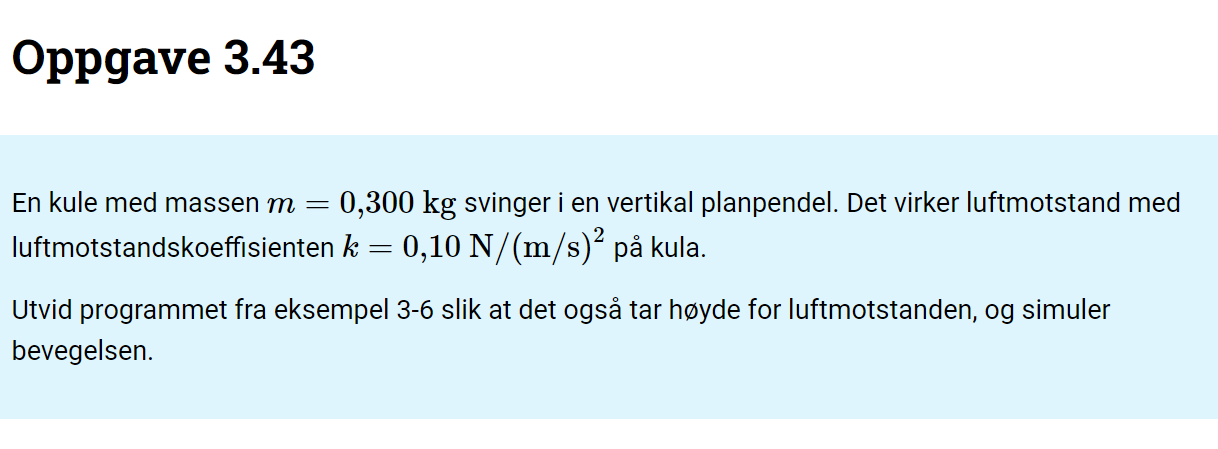

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Lager en liste t med n tidsverdier over en periode T. Lengden av hvert tidssteg kaller vi dt.
T = 10 #s
n = 100000
t = np.linspace(0,T,n)
dt = t[1]-t[0]

#Definerer konstanter.
l = 1.0 #m
v = 0 #m/s
g = 9.81 #m/s^2

#Definerer lister for å ta vare på vinkel- og posisjonsverdier.
theta = np.zeros(n)
omega = np.zeros(n)

#Definerer startverder.
theta[0] = 150*np.pi/180 #radianer
omega[0] = v/l

for i in range(n-1):
  omega[i+1] = omega[i] - g/l*np.sin(theta[i])*dt
  theta[i+1] = theta[i] + omega[i]*dt

#Lager graf for theta som funksjon av tid.
plt.figure(1)
plt.plot(t,theta*180/np.pi)
plt.xlabel('$t$ / s')
plt.ylabel('$\\theta$ / grader')
plt.grid()
plt.show()